In [21]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [22]:
(X_train , y_train),(X_test , y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

50000 - Training Örneği <br>
32x32 - Görsel Boyutları <br>
3 - RGB

In [23]:
X_test.shape

(10000, 32, 32, 3)

10000 - Test Örneği <br>
32x32 - Görsel Boyutları <br>
3 - RGB

In [24]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [25]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [26]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [27]:
classes[0]

'airplane'

In [28]:
def gorsel_goster(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

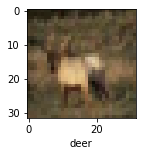

In [29]:
gorsel_goster(X_train, y_train, 3)

RGB kanalı 3 bölümden oluşur. R(kırmızı), G(yeşil) ve B(mavi).<br>
Bu üç ayrı kanalın her biri 0 ile 255 arası bir değer alabilir ve böylece <br>
renkler oluşturulur.<br>
Verisetimizdeki her bir gorselin değerlerini 255'e bölersek, 0 ile 1<br> arasında normalizasyon yapmış oluruz.

In [30]:
X_train = X_train / 255
X_test = X_test / 255

In [31]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [32]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history1 = cnn.fit(X_train, y_train, epochs=100, steps_per_epoch = 50, batch_size = 3)

Epoch 1/100
50/50 [==============================] - 0s 3ms/step - loss: 2.3232 - accuracy: 0.0867
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 2.2927 - accuracy: 0.1267
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 2.2879 - accuracy: 0.0733
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 2.2453 - accuracy: 0.1600
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 2.1293 - accuracy: 0.2000
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 2.0958 - accuracy: 0.1867
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 2.0906 - accuracy: 0.2400
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 2.0841 - accuracy: 0.2400
Epoch 9/100
50/50 [==============================] - 0s 3ms/step - loss: 2.0778 - accuracy: 0.1733
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 1.9997 - accuracy: 0.2400
Epoch 11/

In [34]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4207 - accuracy: 0.4818


[1.420654058456421, 0.48179998993873596]

In [35]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.93262098e-02, 2.11419770e-03, 1.50769338e-01, 3.44102323e-01,
        2.65090019e-02, 2.87988842e-01, 9.53981131e-02, 1.85567848e-02,
        3.34677175e-02, 1.17674051e-02],
       [2.30432853e-01, 3.06034293e-02, 2.84814130e-04, 2.27278251e-05,
        7.08096195e-05, 3.59747190e-07, 5.48025014e-07, 9.57089696e-07,
        7.37349272e-01, 1.23428891e-03],
       [2.89973170e-01, 9.70317274e-02, 5.22906426e-03, 2.34699412e-03,
        2.65229191e-03, 2.71224009e-04, 1.15850155e-04, 7.56267633e-04,
        5.69388688e-01, 3.22346464e-02],
       [4.51340854e-01, 1.16449632e-02, 1.16970073e-02, 9.15140030e-04,
        3.01827933e-03, 4.81925599e-05, 7.62591590e-05, 1.93701868e-04,
        5.16228139e-01, 4.83738445e-03],
       [3.79529479e-03, 1.92758814e-03, 9.48157236e-02, 3.40892851e-01,
        8.60930011e-02, 2.76945055e-01, 1.72627524e-01, 1.75131522e-02,
        3.11403279e-03, 2.27569952e-03]], dtype=float32)

In [36]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 8, 8, 3]

In [37]:

y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [38]:
from sklearn.metrics import confusion_matrix , classification_report
print("Sınıflandırma Sonucu : \n" , classification_report(y_test , y_classes))

Sınıflandırma Sonucu : 
               precision    recall  f1-score   support

           0       0.48      0.57      0.52      1000
           1       0.64      0.63      0.63      1000
           2       0.38      0.33      0.35      1000
           3       0.33      0.33      0.33      1000
           4       0.58      0.11      0.18      1000
           5       0.41      0.52      0.46      1000
           6       0.65      0.52      0.58      1000
           7       0.47      0.67      0.55      1000
           8       0.49      0.63      0.55      1000
           9       0.50      0.52      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



<Figure size 432x288 with 0 Axes>

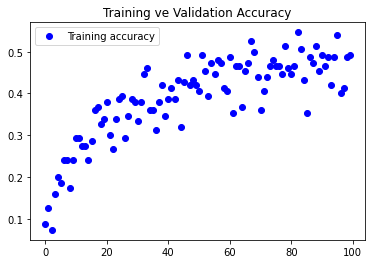

<Figure size 432x288 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history1.history['accuracy']
loss = history1.history['loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.title('Training ve Validation Accuracy')
plt.legend()
plt.figure()